# Objective

Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Data

In [2]:
df=pd.read_excel("customer_churn_large_dataset.xlsx")

In [3]:
df.shape

(100000, 9)

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

Since the "CustomerID" and "Name"columns contains serial numbers in ascending order and doesn't provide any meaningful information for your churn prediction task, it is safe to drop this column.

In [6]:
# Drop the "CustomerID" and "Name" columns
df = df.drop(columns=['CustomerID', 'Name'])

In [7]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [8]:
df.shape

(100000, 7)

# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [10]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


In [11]:
df.describe(include= 'all')

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,2,5,NaN,NaN,NaN,NaN
top,NaN,Female,Houston,NaN,NaN,NaN,NaN
freq,NaN,50216,20157,NaN,NaN,NaN,NaN
mean,44.027020,NaN,NaN,12.490100,65.053197,274.393650,0.497790
std,15.280283,NaN,NaN,6.926461,20.230696,130.463063,0.499998
min,18.000000,NaN,NaN,1.000000,30.000000,50.000000,0.000000
25%,31.000000,NaN,NaN,6.000000,47.540000,161.000000,0.000000
50%,44.000000,NaN,NaN,12.000000,65.010000,274.000000,0.000000
75%,57.000000,NaN,NaN,19.000000,82.640000,387.000000,1.000000


In [12]:
import scipy.stats as stats

numeric_columns = df.select_dtypes(include=[np.number])

# Calculate skewness for each numeric column
skewness = numeric_columns.skew()

# Calculate kurtosis for each numeric column
kurtosis = numeric_columns.kurtosis()

# Print the skewness and kurtosis for each column
for col in numeric_columns.columns:
    print(f'Column: {col}')
    print(f'Skewness: {skewness[col]}')
    print(f'Kurtosis: {kurtosis[col]}')
    print('-' * 20)


Column: Age
Skewness: -0.002688580535339188
Kurtosis: -1.1981801069446432
--------------------
Column: Subscription_Length_Months
Skewness: -0.0016554824859520909
Kurtosis: -1.2056102064968002
--------------------
Column: Monthly_Bill
Skewness: -0.00032573400100265417
Kurtosis: -1.2045683662909459
--------------------
Column: Total_Usage_GB
Skewness: 0.007113380196458567
Kurtosis: -1.201277818271164
--------------------
Column: Churn
Skewness: 0.008840218955990164
Kurtosis: -1.9999618501658254
--------------------


In [13]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

<Axes: >

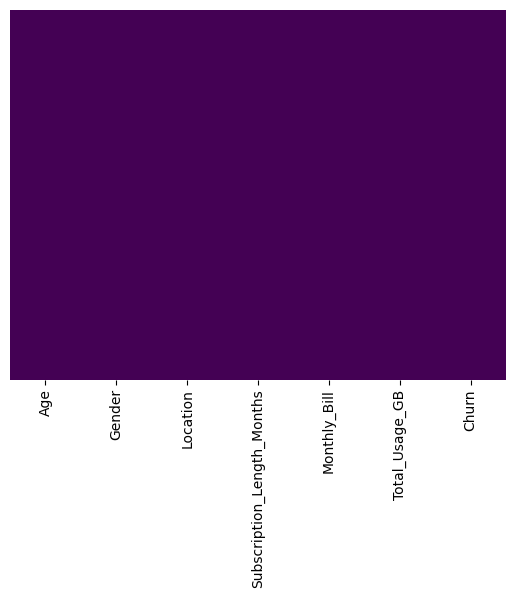

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df.duplicated().sum()

0

In [16]:
df.duplicated().value_counts()

False    100000
dtype: int64

In [17]:
df.nunique()

Age                             53
Gender                           2
Location                         5
Subscription_Length_Months      24
Monthly_Bill                  7001
Total_Usage_GB                 451
Churn                            2
dtype: int64

In [18]:

for col in df.columns:
    value_counts = df[col].value_counts()
    print(f'Column: {col}')
    print(value_counts)
    print('-' * 20)


Column: Age
33    2046
50    1996
38    1970
63    1942
57    1942
19    1941
41    1939
42    1930
51    1929
59    1928
27    1924
66    1922
70    1921
44    1916
69    1912
61    1909
60    1904
31    1901
55    1900
21    1897
54    1896
53    1895
48    1895
39    1891
23    1887
20    1886
29    1885
28    1881
24    1876
58    1876
40    1875
30    1875
26    1874
56    1872
25    1871
37    1870
62    1867
46    1865
68    1863
43    1863
36    1859
49    1854
64    1848
47    1847
35    1845
18    1839
65    1833
45    1827
52    1824
32    1810
67    1798
34    1797
22    1787
Name: Age, dtype: int64
--------------------
Column: Gender
Female    50216
Male      49784
Name: Gender, dtype: int64
--------------------
Column: Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64
--------------------
Column: Subscription_Length_Months
20    4303
22    4267
1     4247
16    4229
2     4228
14 

# Visualization

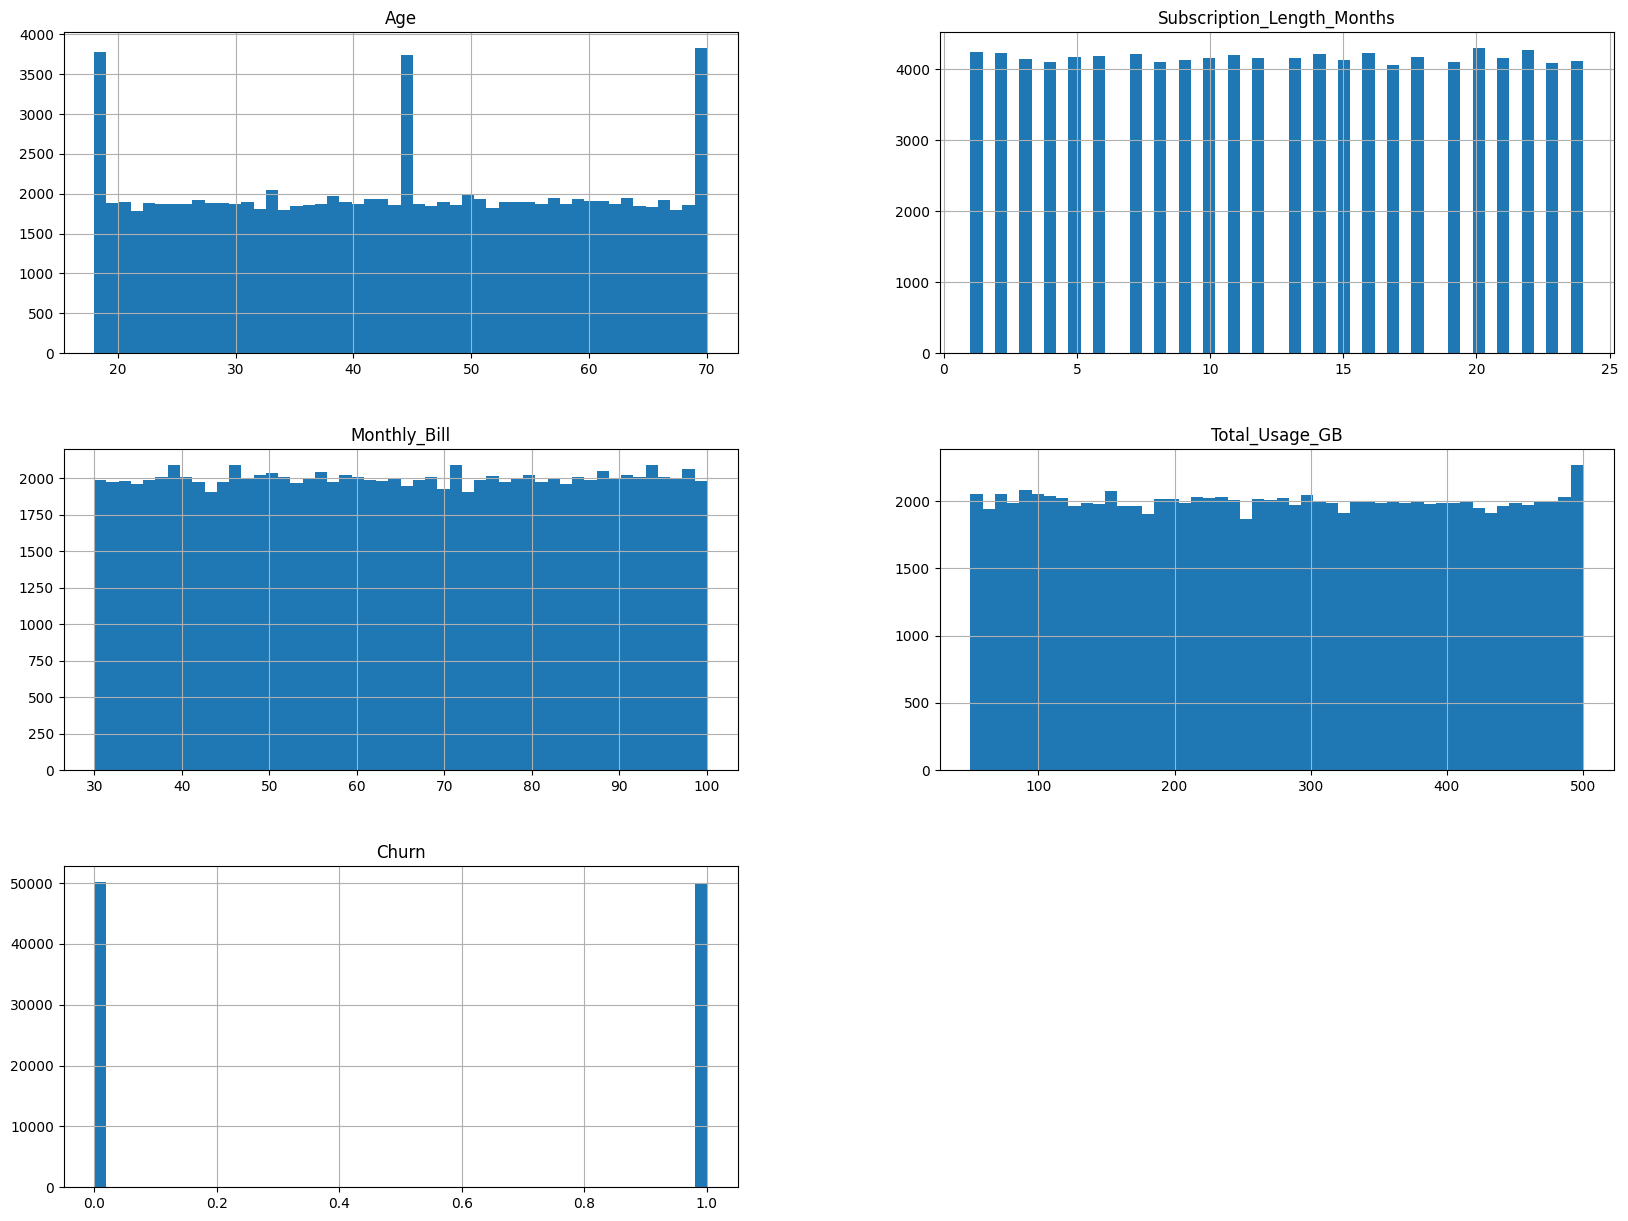

In [19]:
df.hist(bins=50,figsize=(20,15))
plt.show()

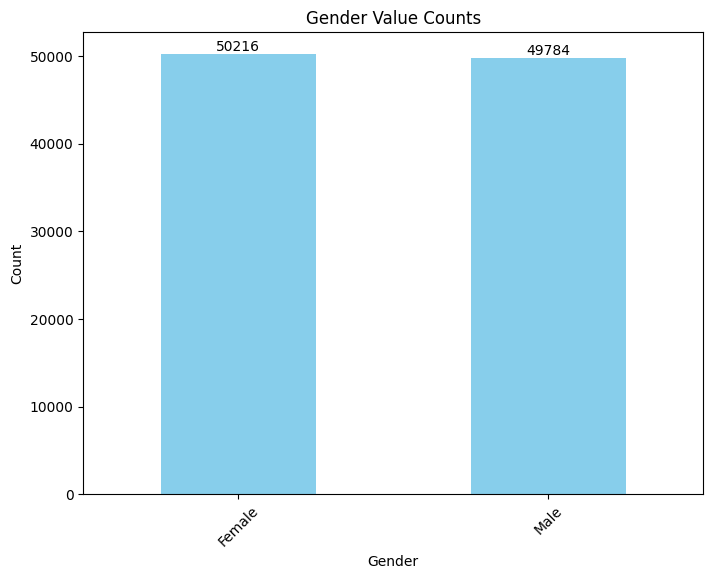

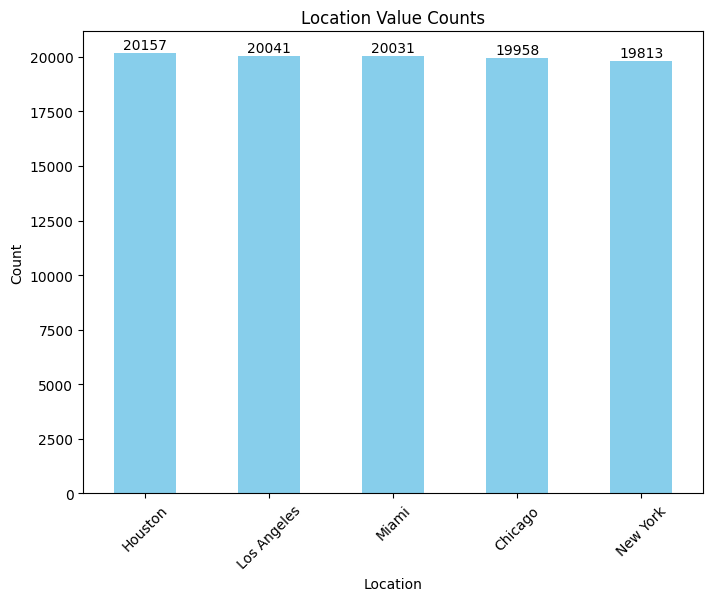

In [20]:
import matplotlib.pyplot as plt

object_columns = df.select_dtypes(include=['object'])

# Iterate through object columns and create bar plots with value counts on top
for col in object_columns.columns:
    plt.figure(figsize=(8, 6))
    value_counts = df[col].value_counts()
    ax = value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'{col} Value Counts')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

    # Add value counts on top of the bars
    for i, v in enumerate(value_counts):
        ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10, color='black')

    plt.show()


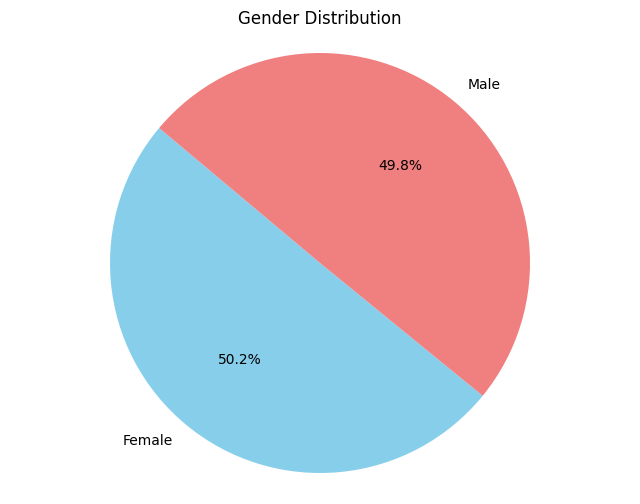

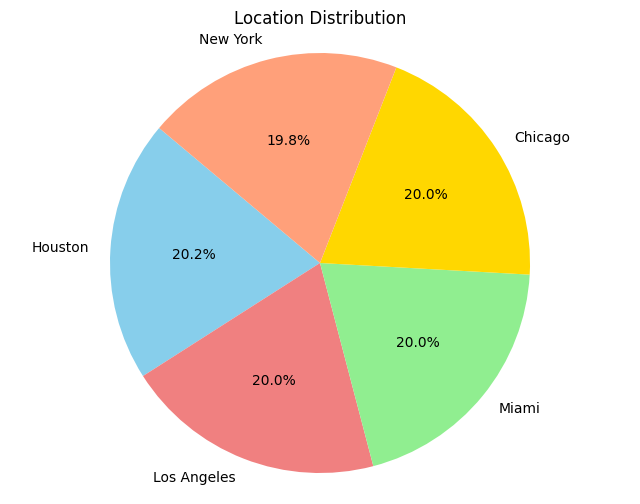

In [21]:
import matplotlib.pyplot as plt

object_columns = df.select_dtypes(include=['object'])

# Iterate through object columns and create pie charts
for col in object_columns.columns:
    plt.figure(figsize=(8, 6))
    value_counts = df[col].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon']  # You can customize the colors

    # Create the pie chart
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'{col} Distribution')
    plt.show()


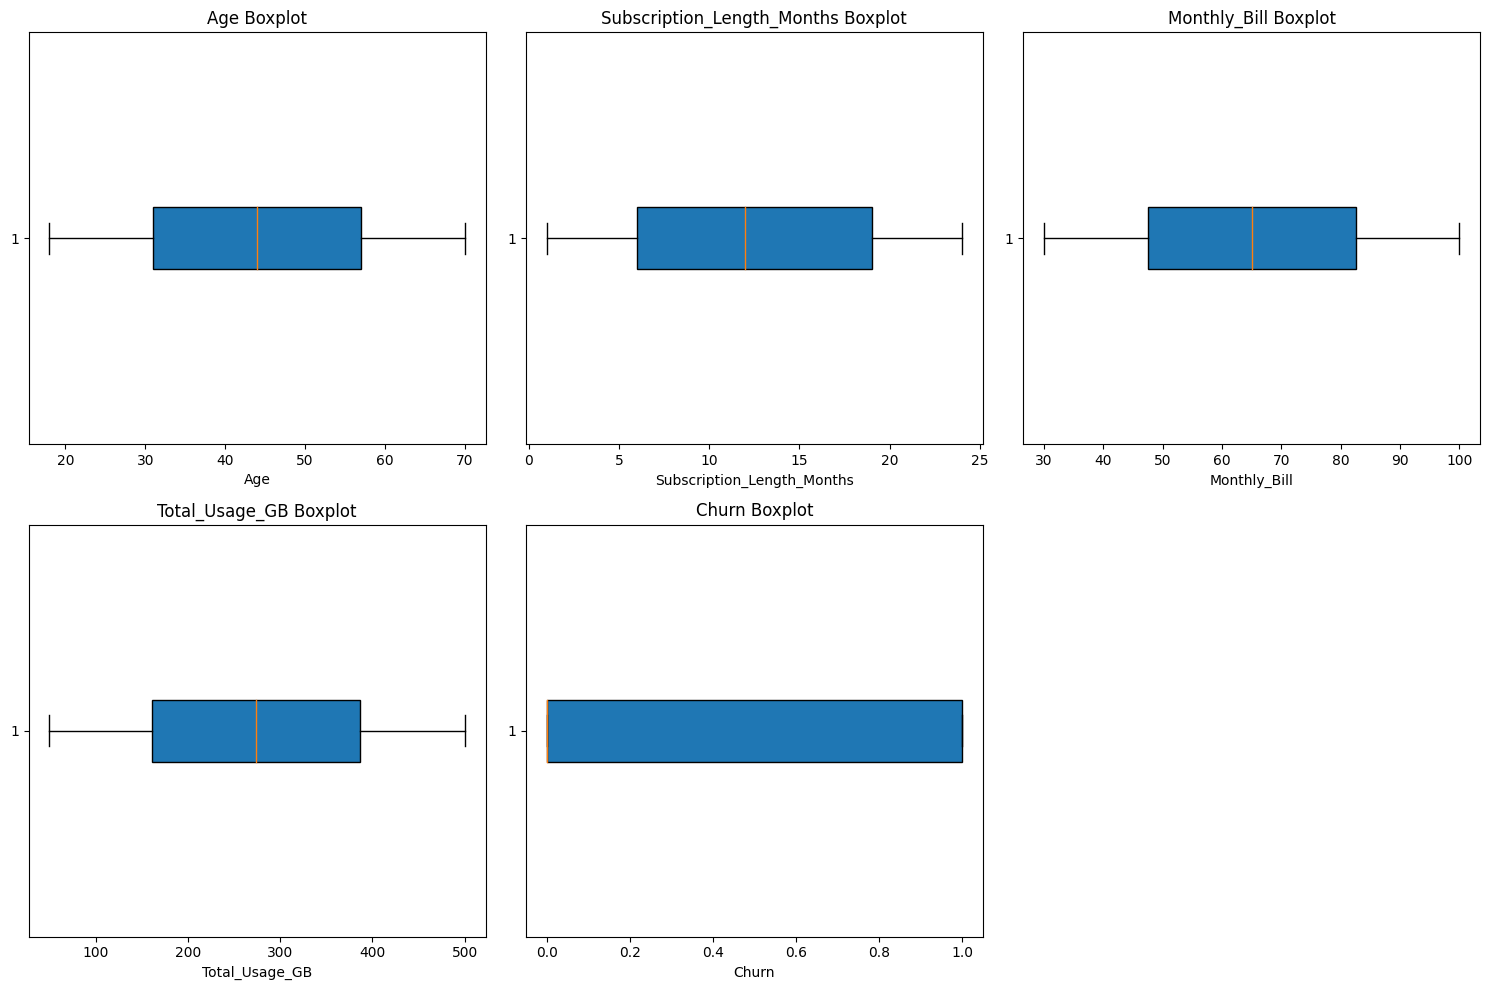

In [22]:
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create a subplot grid
num_plots = len(numeric_columns.columns)
cols_per_row = 3  # Number of columns per row
num_rows = (num_plots - 1) // cols_per_row + 1  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 10))  # Adjust the figsize as needed

# Iterate through numeric columns and create boxplots in subplots
for i, col in enumerate(numeric_columns.columns):
    row_idx = i // cols_per_row
    col_idx = i % cols_per_row
    ax = axes[row_idx, col_idx]

    ax.boxplot(df[col], vert=False, patch_artist=True)
    ax.set_title(f'{col} Boxplot')
    ax.set_xlabel(col)

# Remove empty subplots
for i in range(num_plots, num_rows * cols_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


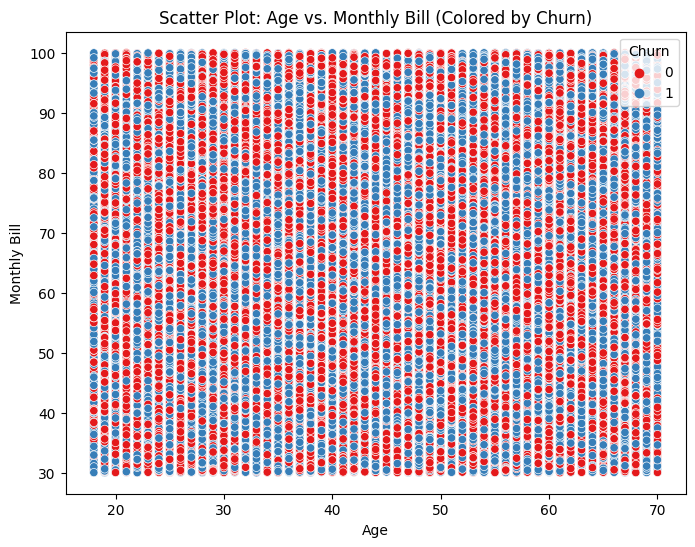

In [23]:
# Scatter plot between 'Age' and 'Monthly_Bill' colored by 'Churn'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Monthly_Bill', data=df, hue='Churn', palette='Set1')
plt.title('Scatter Plot: Age vs. Monthly Bill (Colored by Churn)')
plt.xlabel('Age')
plt.ylabel('Monthly Bill')
plt.legend(title='Churn', loc='upper right')
plt.show()


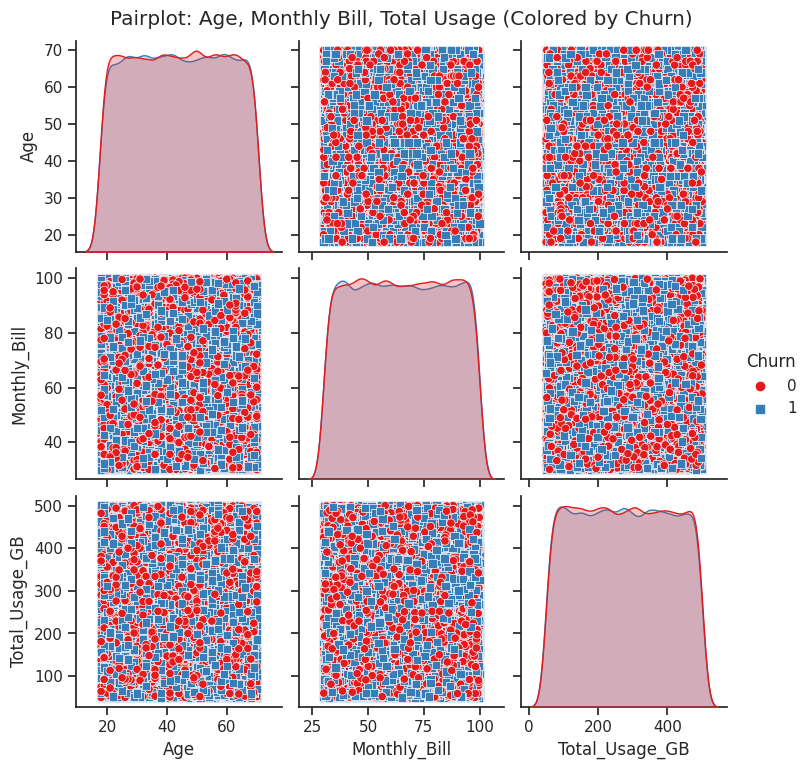

In [24]:
# Pairplot for 'Age,' 'Monthly_Bill,' 'Total_Usage_GB,' colored by 'Churn'
sns.set(style="ticks")
sns.pairplot(df[['Age', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']], hue='Churn', markers=['o', 's'], palette='Set1')
plt.suptitle('Pairplot: Age, Monthly Bill, Total Usage (Colored by Churn)', y=1.02)
plt.show()


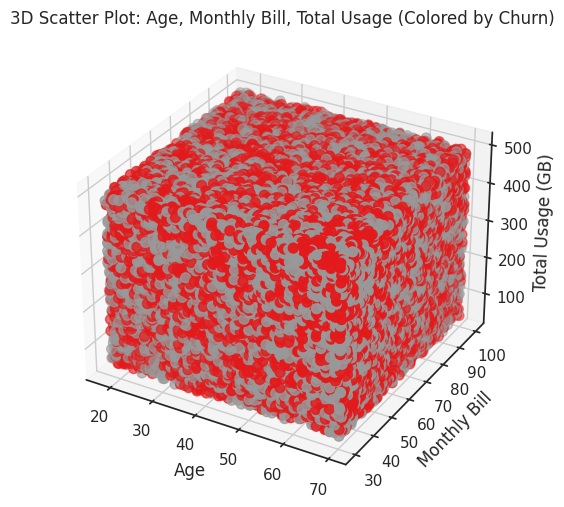

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Monthly_Bill'], df['Total_Usage_GB'], c=df['Churn'], cmap='Set1', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Monthly Bill')
ax.set_zlabel('Total Usage (GB)')
plt.title('3D Scatter Plot: Age, Monthly Bill, Total Usage (Colored by Churn)')
plt.show()


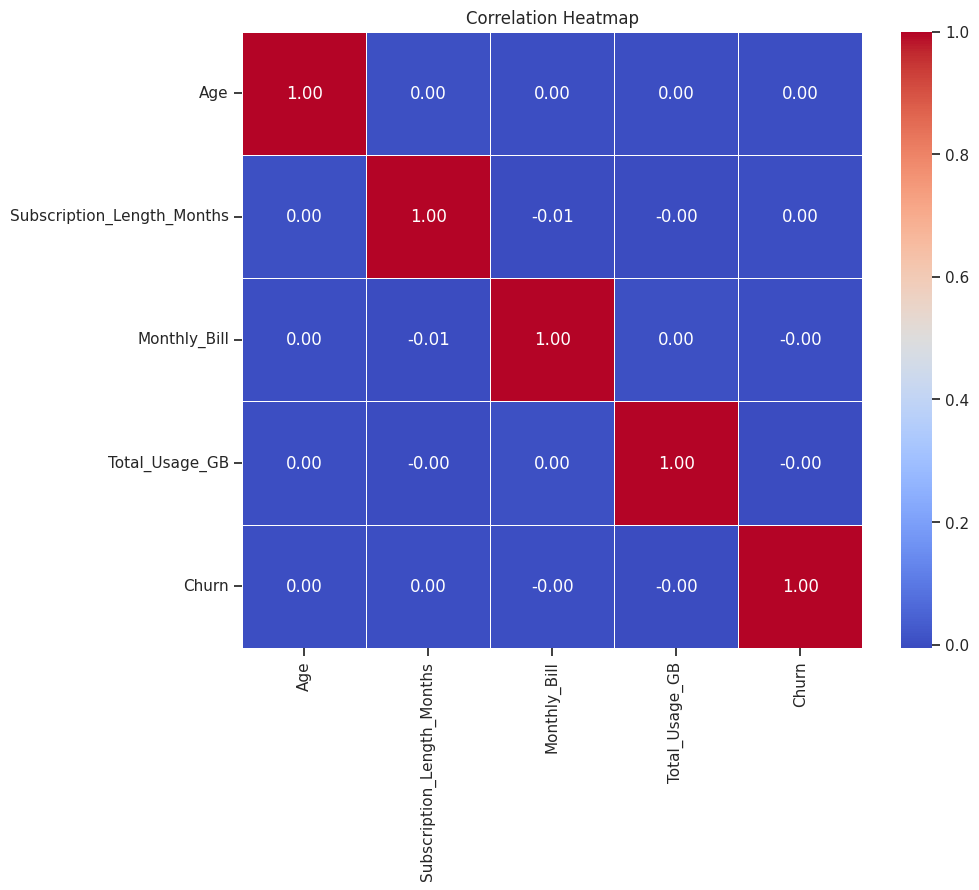

In [26]:

# Select only numerical columns for correlation calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



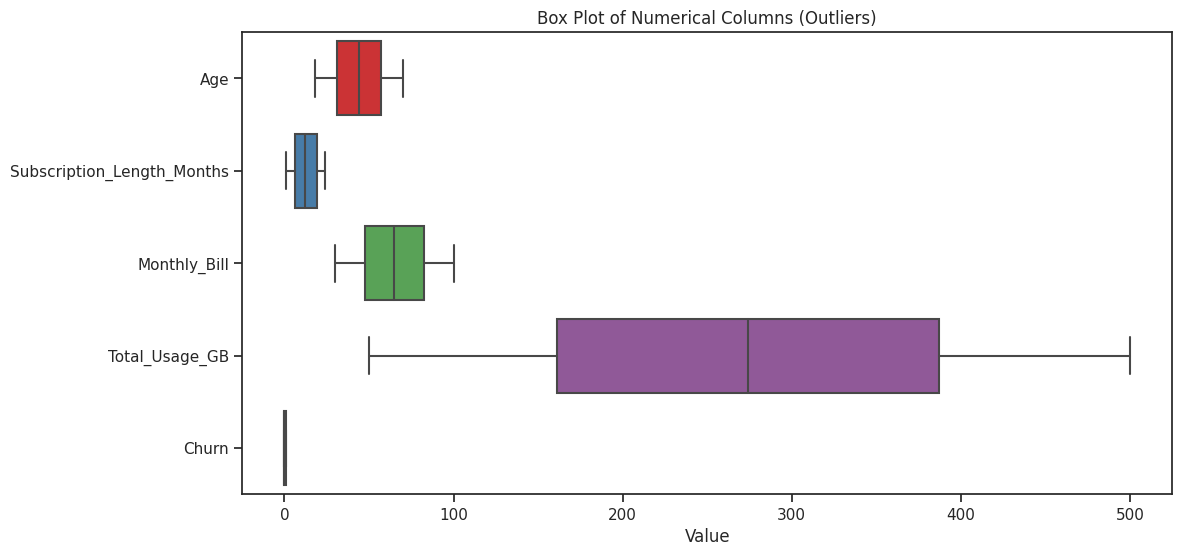

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns, orient='h', palette='Set1')
plt.title('Box Plot of Numerical Columns (Outliers)')
plt.xlabel('Value')
plt.show()


# Outlier Detection

In [28]:
# Calculate the IQR for each numerical column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
outlier_threshold = 1.5

# Identify outliers
outliers = ((numeric_columns < (Q1 - outlier_threshold * IQR)) | (numeric_columns > (Q3 + outlier_threshold * IQR)))

# List columns with outliers
columns_with_outliers = outliers.any()

# Display columns with outliers
print("Columns with outliers:")
print(columns_with_outliers)

# Optionally, remove rows with outliers
# df_no_outliers = df[~outliers.any(axis=1)]


Columns with outliers:
Age                           False
Subscription_Length_Months    False
Monthly_Bill                  False
Total_Usage_GB                False
Churn                         False
dtype: bool


# split the independent and target variable

In [29]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [30]:
# Train test split with stratify shuffling

In [31]:
#stratify shuffle
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
# Print the class distribution in the training and testing sets
print("Class distribution in the training set:")
print(y_train.value_counts())

print("\nClass distribution in the testing set:")
print(y_test.value_counts())


Class distribution in the training set:
0    40177
1    39823
Name: Churn, dtype: int64

Class distribution in the testing set:
0    10044
1     9956
Name: Churn, dtype: int64


In [33]:
X_train.shape

(80000, 6)

In [34]:
X_test.shape

(20000, 6)

In [35]:
X_train.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
22380,65,Female,New York,12,48.05,204
28629,31,Male,Houston,12,56.20,202
41002,18,Female,Houston,16,63.97,151
27398,55,Male,Chicago,10,91.27,285
67113,69,Male,New York,20,31.91,197


# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler


# Select the numerical columns for feature scaling
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the testing data using the same scaler
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Select the categorical columns for one-hot encoding
categorical_columns = ['Gender', 'Location']

# Perform one-hot encoding on the categorical columns for both X_train and X_test
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# The resulting X_train_encoded and X_test_encoded DataFrames contain scaled numerical features and one-hot encoded categorical features



In [37]:
X_train_encoded.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
22380,1.374367,-0.070915,-0.841962,-0.537796,0,0,0,0,1
28629,-0.849222,-0.070915,-0.439567,-0.553118,1,1,0,0,0
41002,-1.699418,0.507496,-0.055934,-0.943823,0,1,0,0,0
27398,0.720370,-0.360121,1.291965,0.082735,1,0,0,0,0
67113,1.635966,1.085907,-1.638852,-0.591422,1,0,0,0,1


# Model building

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())
]

# Iterate through the classifiers and fit/predict/evaluate
for classifier_name, classifier in classifiers:
    # Fit the classifier on the training data
    classifier.fit(X_train_encoded, y_train)

    # Make predictions on the testing data
    y_pred = classifier.predict(X_test_encoded)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a confusion matrix
    confusion = confusion_matrix(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Print the results
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{report}")
    print()


Classifier: Logistic Regression
Accuracy: 0.4993
Confusion Matrix:
[[5794 4250]
 [5764 4192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54     10044
           1       0.50      0.42      0.46      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


Classifier: Decision Tree
Accuracy: 0.5033
Confusion Matrix:
[[5074 4970]
 [4964 4992]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51     10044
           1       0.50      0.50      0.50      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000


Classifier: Random Forest
Accuracy: 0.4957
Confusion Matrix:
[[5235 4809]
 [5277 4679]]
Classification Report:
     

# K-fold cross validation

In [39]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create instances of the models you want to evaluate
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())
]

# Define the number of folds (k)
k = 5  # You can choose the number of folds you want

# Create a KFold object with shuffling if needed
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate through the models and perform k-fold cross-validation
for model_name, model in models:
    scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring='accuracy')

    # Calculate and print the mean and standard deviation of the scores
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()

    print(f"Model: {model_name}")
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", mean_accuracy)
    print("Standard Deviation of Accuracy:", std_accuracy)
    print("\n")


Model: Logistic Regression
Cross-Validation Scores: [0.49725   0.5020625 0.501875  0.5089375 0.5045   ]
Mean Accuracy: 0.502925
Standard Deviation of Accuracy: 0.0038126844217690036


Model: Decision Tree
Cross-Validation Scores: [0.5010625 0.4965625 0.5025625 0.4949375 0.4959375]
Mean Accuracy: 0.4982125
Standard Deviation of Accuracy: 0.0030222094566723936


Model: Random Forest
Cross-Validation Scores: [0.5035    0.4980625 0.4980625 0.5044375 0.4995   ]
Mean Accuracy: 0.5007124999999999
Standard Deviation of Accuracy: 0.0027262038625164987


Model: K-Nearest Neighbors
Cross-Validation Scores: [0.5086875 0.5008125 0.4963125 0.5045625 0.50825  ]
Mean Accuracy: 0.503725
Standard Deviation of Accuracy: 0.0046739972186555625


Model: Naive Bayes
Cross-Validation Scores: [0.501875  0.50375   0.5003125 0.511     0.5101875]
Mean Accuracy: 0.505425
Standard Deviation of Accuracy: 0.0043659549356355005




# ANN

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialize the Sequential model
classifier = Sequential()

# Add the input layer with the correct input dimension (9)
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=9))

# Add hidden layers
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Add the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
classifier.fit(X_train_encoded, y_train, batch_size=10, epochs=20)


Epoch 1/20
8000/8000 [==============================] - 16s 2ms/step - loss: 0.6932 - accuracy: 0.5014
Epoch 2/20
8000/8000 [==============================] - 16s 2ms/step - loss: 0.6932 - accuracy: 0.5015
Epoch 3/20
8000/8000 [==============================] - 15s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 4/20
8000/8000 [==============================] - 16s 2ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 5/20
8000/8000 [==============================] - 16s 2ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 6/20
8000/8000 [==============================] - 15s 2ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 7/20
8000/8000 [==============================] - 15s 2ms/step - loss: 0.6932 - accuracy: 0.5014
Epoch 8/20
8000/8000 [==============================] - 15s 2ms/step - loss: 0.6932 - accuracy: 0.5006
Epoch 9/20
8000/8000 [==============================] - 16s 2ms/step - loss: 0.6932 - accuracy: 0.5040
Epoch 10/20
8000/8000 [==============================] - 16s 2ms/step - l

In [41]:
X_test = X_test_encoded.to_numpy(dtype=np.float32)
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5).astype(np.float32)

625/625 [==============================] - 1s 1ms/step


In [42]:
import numpy as np

# Predict the probabilities using the classifier
y_pred = classifier.predict(X_test)

# Convert y_pred to a NumPy array of floats
y_pred = (y_pred > 0.5).astype(np.float32)



625/625 [==============================] - 1s 1ms/step


In [43]:
y_pred


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.4978
Confusion Matrix:
[[    0 10044]
 [    0  9956]]


# Gradient Boosting Classifier (e.g., AdaBoost):

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model to the training data
adaboost_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
adaboost_predictions = adaboost_classifier.predict(X_test_encoded)

# Calculate accuracy
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)


AdaBoost Accuracy: 0.50375


# Bagging (Bootstrap Aggregating) with Decision Trees:

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier as the base estimator
base_estimator = DecisionTreeClassifier()

# Create a Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Fit the model to the training data
bagging_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
bagging_predictions = bagging_classifier.predict(X_test_encoded)

# Calculate accuracy
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Accuracy:", bagging_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.4953


# XGBoost (Extreme Gradient Boosting):

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
xgb_predictions = xgb_classifier.predict(X_test_encoded)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# Confusion Matrix
confusion = confusion_matrix(y_test, xgb_predictions)
print("Confusion Matrix:\n", confusion)

# Classification Report
report = classification_report(y_test, xgb_predictions)
print("Classification Report:\n", report)


XGBoost Accuracy: 0.5016
Confusion Matrix:
 [[5286 4758]
 [5210 4746]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51     10044
           1       0.50      0.48      0.49      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [48]:


# Make predictions on the test data
xgb_test_predictions = xgb_classifier.predict(X_test_encoded)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, xgb_test_predictions)
print("XGBoost Test Accuracy:", test_accuracy)

# You can also print the confusion matrix and classification report for more details
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
confusion = confusion_matrix(y_test, xgb_test_predictions)
print("Confusion Matrix:\n", confusion)

# Classification Report
report = classification_report(y_test, xgb_test_predictions)
print("Classification Report:\n", report)


XGBoost Test Accuracy: 0.5016
Confusion Matrix:
 [[5286 4758]
 [5210 4746]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51     10044
           1       0.50      0.48      0.49      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



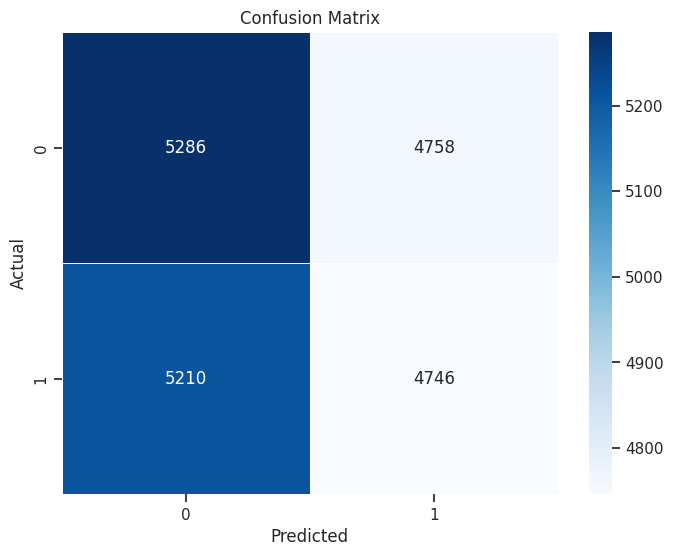

In [49]:
import seaborn as sns

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


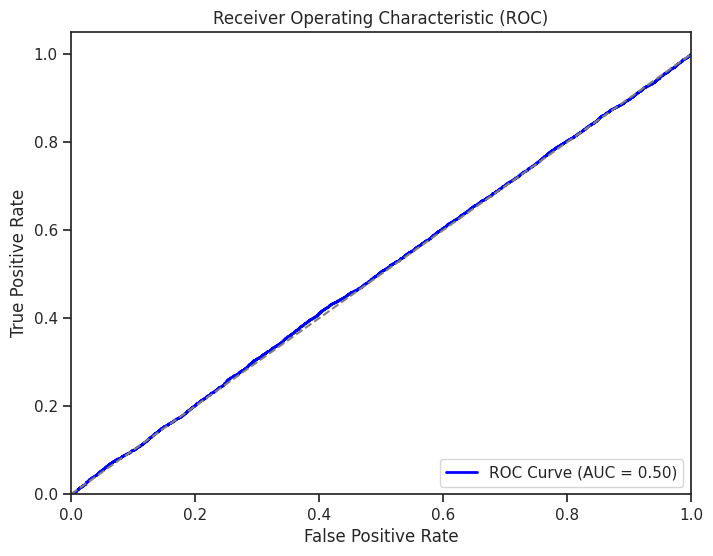

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
xgb_test_probs = xgb_classifier.predict_proba(X_test_encoded)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, xgb_test_probs)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, xgb_test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


since all the models are showing around 50% accuracy

In [51]:
import joblib

# Save the XGBoost model to disk with a different name
filename = 'my_custom_xgb_model.sav'
joblib.dump(xgb_classifier, filename)



['my_custom_xgb_model.sav']

In [52]:
!pip install Flask requests


In [ ]:
from flask import Flask, request, jsonify, render_template
import joblib
import pandas as pd
import numpy as np
import json

app = Flask(__name__)

# Load your pre-trained model
model = joblib.load('my_custom_xgb_model.sav')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from the request
        data = request.form.to_dict()


        # Create a DataFrame from the input data
        input_data = pd.DataFrame(data, index=[0])

        # Ensure the data types and column names match the model's expectations
        input_data = input_data.astype({
            'Age': int,
            'Subscription_Length_Months': int,
            'Monthly_Bill': float,
            'Total_Usage_GB': float,
            'Gender_Male': int,
            'Location_Houston': int,
            'Location_Los Angeles': int,
            'Location_Miami': int,
            'Location_New York': int
        })

        # Make predictions using your pre-trained model
        predictions = model.predict(input_data)

        # Return the predictions as a response
        return render_template('results.html', predictions=predictions)

    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
